In [ ]:
! pip install pixellib

In [ ]:
! pip install semantic_segmentation

In [ ]:
!pip3 install tensorflow==2.6.0
!pip3 install keras==2.6.0
!pip3 install imgaug
!pip3 install pillow==8.2.0
!pip install pixellib==0.5.2
!pip install labelme2coco==0.1.2

In [4]:
# from tensorflow.keras.layers import BatchNormalization
# 즉, 위 코드처럼 .python 을 지우면 됨

from pixellib.semantic import semantic_segmentation

In [5]:
# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리. 
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구
import os
import urllib
import cv2
import numpy as np
from matplotlib import pyplot as plt

print('슝=3')

슝=3


# 데이터 불러오기

1번: (512, 512, 3)
2번: (960, 960, 3)
3번: (452, 680, 3)


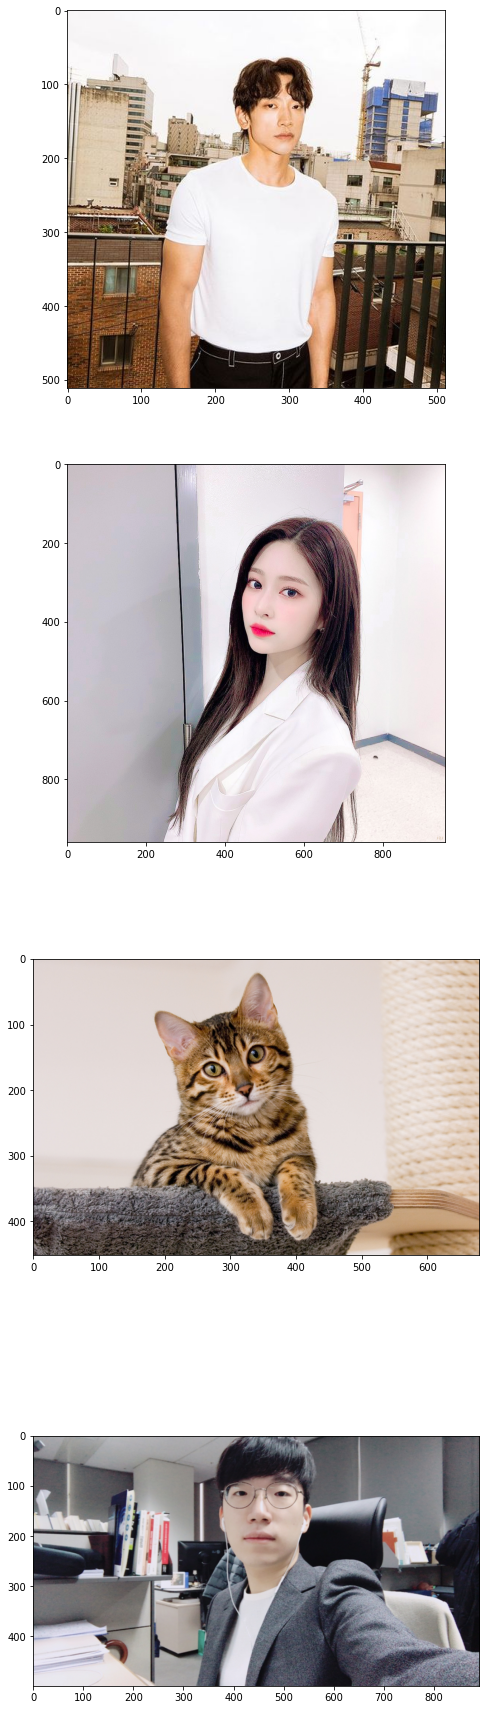

In [63]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path_0 = '/content/drive/MyDrive/아이펠 데이터/exp9_portrait/my_image.png' 
img_path_1 = '/content/drive/MyDrive/아이펠 데이터/exp9_portrait/photo1.jpg' 
img_path_2 = '/content/drive/MyDrive/아이펠 데이터/exp9_portrait/photo2.jfif'
img_path_3 = '/content/drive/MyDrive/아이펠 데이터/exp9_portrait/cat.jpg'

img_orig_0 = cv2.imread(img_path_0)
img_orig_1 = cv2.imread(img_path_1)
img_orig_2 = cv2.imread(img_path_2) 
img_orig_3 = cv2.imread(img_path_3) 

print('1번:', img_orig_1.shape)
print('2번:', img_orig_2.shape)
print('3번:', img_orig_3.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

# plt.figure는 사진들이 나올 공간의 크기 결정
# plt.subplot은 여러 사진들을 출력할 때 그 위치를 결정

plt.figure(figsize=(8,32))

plt.subplot(4,1,1)
plt.imshow(cv2.cvtColor(img_orig_1, cv2.COLOR_BGR2RGB))

plt.subplot(4,1,2)
plt.imshow(cv2.cvtColor(img_orig_2, cv2.COLOR_BGR2RGB))

plt.subplot(4,1,3)
plt.imshow(cv2.cvtColor(img_orig_3, cv2.COLOR_BGR2RGB))

plt.subplot(4,1,4)
plt.imshow(cv2.cvtColor(img_orig_0, cv2.COLOR_BGR2RGB))

plt.show()

# 인물모드 직접 해보기

## 세그멘테이션으로 인물 분리하기

In [64]:
# 모델 다운로드

# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir =  '/content/drive/MyDrive/아이펠 데이터/exp9_portrait/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/content/drive/MyDrive/아이펠 데이터/exp9_portrait/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fa31326b710>)

In [65]:
# 모델 생성

model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [66]:
# 모델에 이미지 입력

segvalues, output = model.segmentAsPascalvoc(img_path_1) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

In [67]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

이 중에서 사람에 해당하는 라벨만 분리하고자 한다.

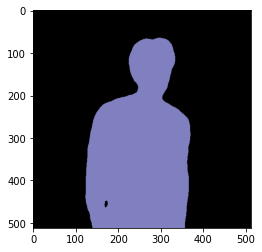

In [68]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [69]:
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [70]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

PixelLib에 따르면 위와 같은 색을 사용했다고 하네요. 그럼 사람을 나타내는 15번째 색상은 무엇일까요?

In [71]:
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

사람 외에도 다른 물체를 찾아내고 싶다면 colormap[class_id]처럼 찾아낼 수 있겠네요!

여기서 주의할 것은 output 이미지가 BGR 순서로 채널 배치가 되어 있다는 점이에요. colormap은 RGB 순서이고요.

그러니 우리가 추출해야 하는 색상 값은 순서를 아래처럼 바꿔 줘야 합니다.

In [72]:
seg_color = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

이제 seg_color로만 이루어진 마스크를 만들어 봅시다.

(512, 512)


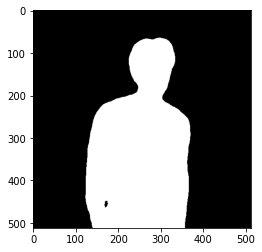

In [73]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

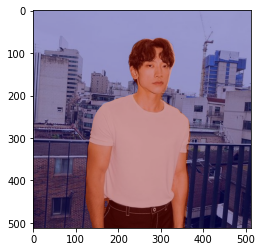

In [74]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig_1.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스크를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 배경 흐리게 하기

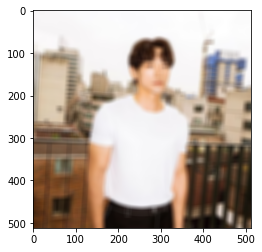

In [75]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig_1, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

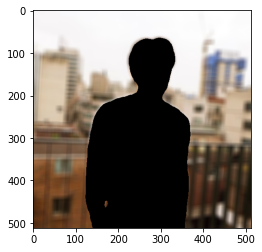

In [76]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

bitwise_not 함수를 이용하면 이미지가 반전됩니다. 원래 마스크에서는 배경이 0, 사람이 255였으니 bitwise_not 연산을 하고 나면 배경은 255, 사람은 0이 됩니다.

반전된 세그멘테이션 결과를 이용해서 이미지와 bitwise_and 연산을 수행하면 배경만 있는 영상을 얻을 수 있습니다. 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지게 되는 거죠.

## 두 사진 합성

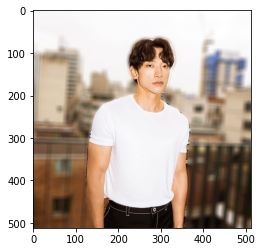

In [77]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig_1, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 아닌 영역은 블러된 이미지 값을 사용합니다. np.where(조건, 참일때, 거짓일때)의 형식의 코드를 사용했습니다.

[numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

## 위 과정 함수화



In [78]:
model_dir =  '/content/drive/MyDrive/아이펠 데이터/exp9_portrait/models' 

model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

model = semantic_segmentation() 
model.load_pascalvoc_model(model_file)

In [79]:
def Portrait(path):
  segvalues, output = model.segmentAsPascalvoc(path)
  img_orig = cv2.imread(path)
  colormap = np.zeros((256, 3), dtype = int)
  ind = np.arange(256, dtype=int)

  for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

  seg_color = (128,128,192)
  seg_map = np.all(output==seg_color, axis=-1) 

  # True과 False인 값을 각각 255과 0으로 바꿔줍니다
  img_mask = seg_map.astype(np.uint8) * 255

  img_orig_blur = cv2.blur(img_orig, (13,13))

  img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

  # cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
  # 연산을 하고 나면 배경은 255 사람은 0입니다.
  img_bg_mask = cv2.bitwise_not(img_mask_color)

  # cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
  # 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
  # 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
  img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

  img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
  # plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
  # cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
  # cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
  # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
  plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
  plt.show()

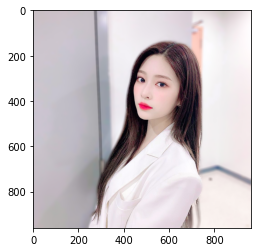

In [80]:
Portrait(img_path_2)

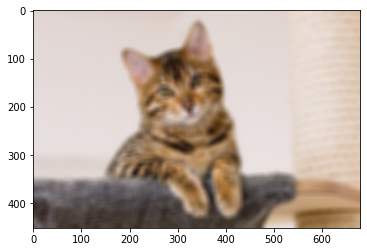

In [81]:
Portrait(img_path_3)

위 함수가 사람을 대상으로 하도록 만들어져 있으므로 고양이에 대해서는 작동하지 않는 모습이다. 

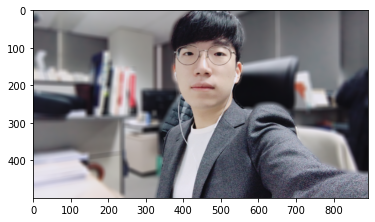

In [104]:
Portrait(img_path_0)

## 고양이 모드

In [83]:
# 고양이의 인덱스 = 8

colormap[8]

array([64,  0,  0])

In [84]:
def Portrait_Cat(path):
  segvalues, output = model.segmentAsPascalvoc(path)
  img_orig = cv2.imread(path)
  colormap = np.zeros((256, 3), dtype = int)
  ind = np.arange(256, dtype=int)

  for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

  seg_color = (0,0,64) # colormap[8] 이용
  seg_map = np.all(output==seg_color, axis=-1) 

  # True과 False인 값을 각각 255과 0으로 바꿔줍니다
  img_mask = seg_map.astype(np.uint8) * 255

  img_orig_blur = cv2.blur(img_orig, (13,13))

  img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

  # cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
  # 연산을 하고 나면 배경은 255 사람은 0입니다.
  img_bg_mask = cv2.bitwise_not(img_mask_color)

  # cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
  # 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
  # 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
  img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

  img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
  # plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
  # cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
  # cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
  # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
  plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
  plt.show()

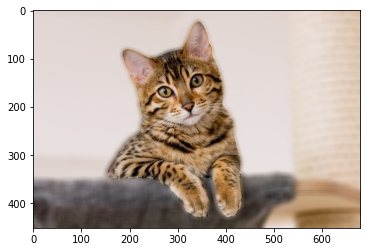

In [85]:
Portrait_Cat(img_path_3)

## 크로마키 모드

In [86]:
img_path_bg = '/content/drive/MyDrive/아이펠 데이터/exp9_portrait/backg.jpg'

img_orig_bg = cv2.imread(img_path_bg)

In [97]:
def Portrait_CK(path):
  segvalues, output = model.segmentAsPascalvoc(path)
  img_orig = cv2.imread(path)
  colormap = np.zeros((256, 3), dtype = int)
  ind = np.arange(256, dtype=int)

  x,y = img_orig.shape[1], img_orig.shape[0]
  dst = img_orig_bg[0:y, 0:x].copy()

  for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

  seg_color = (128,128,192) # colormap[15] 이용
  seg_map = np.all(output==seg_color, axis=-1) 

  # True과 False인 값을 각각 255과 0으로 바꿔줍니다
  img_mask = seg_map.astype(np.uint8) * 255

  img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

  img_concat = np.where(img_mask_color==255, img_orig, dst)
  # plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
  # cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
  # cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
  # 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
  plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
  plt.show()

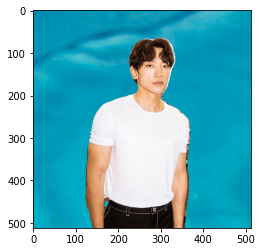

In [98]:
Portrait_CK(img_path_1)

# 인물모드의 문제점

## 사진에서 문제점 찾기
그러나 여러분들의 사진에는 무언가 문제점이 있을 것입니다.

아래 사진에도 문제점이 몇 가지 있었습니다. 예를 들어 뒤에 걸린 옷이 인물 영역에 포함되어 blur되지 않고 나온다던가 하는 경우입니다. ㅠㅠ 그 외 다른 문제들이 눈에 띄시나요? 아래 사진에는 이상한 점이 최소 2개 이상 더 있습니다. 어떤 문제가 있는지 찾아서 아래 사진처럼 표시해 봅시다.

추가로 여러분이 만들어 낸 인물 모드 사진 중 하나에서도 이상한 위치를 찾아 아래 사진처럼 표시해 봅시다. 표시한 이미지들을 jupyter notebook에 포함하여 제출해 주세요.

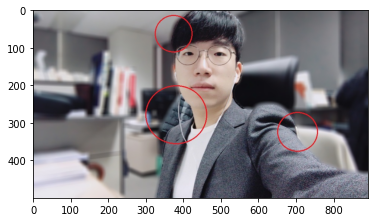

In [106]:
img_path_p = '/content/drive/MyDrive/아이펠 데이터/exp9_portrait/pb.jpg'

img_orig_p = cv2.imread(img_path_p)

plt.imshow(cv2.cvtColor(img_orig_p, cv2.COLOR_BGR2RGB))

plt.show()

인물 모드를 직접 만들어보고 적용해보았는데, 대체로 잘 작동했지만 세밀한 부분에서 약간의 문제가 있었다. 위 사진을 예시로 들면 첫째로 뒤에서 의자에 걸려있는 옷이 블러처리가 되지 않은 것, 머리 카락의 일부가 블러처리 된 것, 배경과 인물의 경계면에서 배경이 약간 블러처리 되지 않은 것이다. (이 경계면 문제는 크로마키 모드에서 더 티가 난다.)

## 해결 방법을 제안해 보기
아주 간단히 멋진 카메라 앱 서비스를 만들어 출시할 수 있을 것 같았지만, 지금 같은 완성도로는 어림도 없습니다. 소비자들의 눈높이는 그리 호락호락하지 않고, 엔지니어인 여러분들은 답을 찾아내야 합니다.

생각해 볼 만한 주제를 아래에 몇 가지 제시해 봅니다. 아래를 읽어본 후, 여러분이 만든 인물모드 사진의 문제점을 해결할 방안을 정리하여 제안해 주시기 바랍니다.
단순히 'XXX 기술을 사용한다.' 정도의 선언적 솔루션이 아니라, 여러분들이 선택한 기술이 DeepLab 모델의 Semantic Segmentation 이 만들어 낸 Mask 영역에 어떻게 적용되어 문제점을 보완하게 되는지의 메커니즘이 포함된 솔루션이어야 합니다.

우선 첫째로 뒤에 걸려있는 옷이 블러처리가 되지 않은 문제를 보자. 이것은 뒤에 걸린 옷과 입고 있는 옷의 색이 비슷해서 생긴 것이다. 그렇다면 어떻게 해야 인물이 입은 외투와 뒤에 있는 옷을 구분할 수 있을까? 저 둘에는 하나의 차이점이 존재한다. 바로 '거리'이다. 만약 처음 사진을 찍을 때 카메라로부터 얼마나 떨어져있는지에 대한 정보를 기록해둘 수 있다면 그것을 토대로 둘을 분리할 수 있을 것이다. 그러기 위해선 3D 카메라 기술이 필요하다.

3D 카메라 기술은 말 그대로 평면적으로 사물을 인식하는 것이 아니라 빛이 피사체에 닿아 되돌아오는 것을 분석하여 거리를 파악한다. 이에 대해 D-ToF 라는 기술이 있는데 빛이 반사되어 되돌아오는 시간차를 이용하는 것이다. 마치 박쥐가 초음파로 주변 지형을 파악하는 것과 같은 기술이라고 볼 수 있겠다.

이렇게 거리 정보를 이미지에 담아둘 수 있다면 위에 있는 세그멘테이션의 마이크 영역에 적용할 수 있다. 위 사진으로 예를 들면 저기 인물에 대해서는 거리 정보가 일정하거나 연속적이므로 갑자기 거리에 차이가 생기는 지점이 존재할 것이며 바로 그것이 뒤에 있는 옷과 인물을 구분할 수 있게 해줄 것이다. 이는 다른 두 문제에 대해서도 마찬가지로 적용될 수 있다.

'렌즈와의 거리'라는 데이터를 이미지 위에 그리게 되면 이것을 인물을 미리 구분해둔 마스크 영역과 비교하여 어느 부분은 잘라내고 어느 부분은 추가로 덧붙이는 방식으로 사용할 수 있을 것이다. 거리 데이터가 불연속적인 지점이 곧 인물과는 별개인 배경으로 존재하는 부분일 테니 말이다.

이것은 3D 카메라가 아닌 적외선 카메라로 찍은 데이터로도 부분적으로 가능할 것으로 보인다. 배경과 인물의 열 분포가 거의 비슷할 확률이 높지 않아 보이니 말이다. 하지만 추운 겨울날 야외에서 촬영하는 식의 상황에선 어려움이 있다.

# 회고

이번 노드에서는 인물 모드로 사진을 처리하는 방법을 배웠다. DeepLab 모델을 통해 사진 이미지에서 인물, 배경, 고양이들을 구분하도록 하고 그 결과로 얻은 마스크 영역을 사진에 적용해 배경을 블러처리해 마치 얕은 피사계 심도로 촬영한 것과 같은 사진을 얻을 수 있었다. 대체로 DeepLab 모델은 잘 작동했으나 몇 가지 아쉬운 부분이 있었다. 위에서 살펴본 3가지 문제점이 바로 그것이다. 그리고 크로마키 모드에서 더 눈에 띈 문제로 배경과 모델의 경계선 쪽에서 구분이 확실하게 되지 않은 모습도 보였다. 

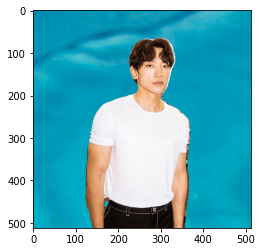

오른팔과 얼굴 쪽에 배경이 제대로 분리되지 않은 것이 보인다. 이런 문제를 해결하기 위해서는 더 정확도가 높은 모델을 사용하거나 처음부터 특별한 카메라로 촬영해서 추가적인 정보를 가져야한다. 하지만 둘 다 쉽지만은 않아 보인다.

여기서 중요한 점은 학습모델이 이미지 내에서 다양한 객체들을 구분할 수 있었다는 사실이다. 비록 배경이 조금 섞이기는 했지만 우리처럼 잘라내서 다른 사진과 합성하는 일이 아니라 한 사진 내에 있는 존재가 고양이인지 사람인지, 또는 사람이라면 몇 명인지 등을 묻는 문제였다면 달랐을 것이다. 그 때는 배경과의 구분이 매우 엄격할 필요가 없으므로 그 정도의 요구에서는 매우 잘 작동했을 것이다. 

# Reference

https://news.skhynix.co.kr/post/next-gen-3d 3D 카메라